**EXPLORATORY DATA ANALYSIS**

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [137]:
df = pd.read_csv("predictive_maintenance.csv")

In [138]:
df.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


In [139]:
#setting index
df.set_index("UDI", inplace = True)

In [140]:
df.head(2)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


In [141]:
#checking null values
df.isna().sum()
#as we can see there are no null values here

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [142]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [143]:
#customization
df.describe().style.background_gradient(cmap="icefire")
#like "icefire", there are other options too: autumn, Oranges, gist_earth, inferno, bone

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [144]:
#to find the datatype of each column
df.dtypes

Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [145]:
#we dont require product id 
df.drop("Product ID", axis = 1, inplace = True)

In [146]:
#number of rows, number of columns
df.shape 

(10000, 8)

In [147]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [148]:
#renaming columns
df.rename(columns = {"Air temperature [K]": "Air_temp"}, inplace = True)
df.rename(columns = {"Process temperature [K]": "Process_temp"}, inplace = True)
df.rename(columns = {"Rotational speed [rpm]": "Rotational_speed"}, inplace = True)
df.rename(columns = {"Torque [Nm]": "Torque"}, inplace = True)
df.rename(columns = {"Tool wear [min]": "Tool_wear"}, inplace = True)
df.rename(columns = {"Failure Type": "Failure_type"}, inplace = True)

In [149]:
df.head(2)

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target,Failure_type
UDI,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L,298.2,308.7,1408,46.3,3,0,No Failure


In [150]:
#finding the number of products whose types are L and have no failure
len(df[(df.Type == "L") & (df.Failure_type == "No Failure")])

5757

In [151]:
#finding the number of proucts whose types are M and have had failures -- using "isin"
len(df[(~df.Failure_type.isin(["No Failure"])) & (df.Type.isin(["M"]))])

#note --> in these ways, we can make condiitons acc to the type of data we're looking for

81

In [152]:
#details of rotational speed
print(f"RS_min: {df.Rotational_speed.min()}")
print(f"RS_max: {df.Rotational_speed.max()}")
print(f"RS_quantile25: {df.Rotational_speed.quantile(.25)}")
print(f"RS_quantile50: {df.Rotational_speed.quantile(.50)}")
print(f"RS_quantile75: {df.Rotational_speed.quantile(.75)}")
print(f"RS_mean: {df.Rotational_speed.mean()}")
print(f"RS_median: {df.Rotational_speed.median()}")
print(f"RS_mode: {df.Rotational_speed.mode()}")
print(f"RS_standard_deviation: {df.Rotational_speed.std()}")

RS_min: 1168
RS_max: 2886
RS_quantile25: 1423.0
RS_quantile50: 1503.0
RS_quantile75: 1612.0
RS_mean: 1538.7761
RS_median: 1503.0
RS_mode: 0    1452
Name: Rotational_speed, dtype: int64
RS_standard_deviation: 179.2840959134266


In [153]:
#groupby --> makes it easier for the viewer to further analyze the given data
df.groupby(["Type", "Failure_type"]).size()

#evaluation:
#i. solely looking at the numbers, the machine type with the greatest amount of failure is L
#ii. again, only looking at the numbrs, the machine type with the least amount of failures is also 5757
#threfore, it is important to look into graphs & also probability to make a proper evaluation as to
#which type of machiine actually has the greatest amout of failure
# amount of failures: H-98 L-273 M-81

Type  Failure_type            
H     Heat Dissipation Failure       8
      No Failure                   979
      Overstrain Failure             1
      Power Failure                  5
      Random Failures                4
      Tool Wear Failure              6
L     Heat Dissipation Failure      74
      No Failure                  5757
      Overstrain Failure            73
      Power Failure                 59
      Random Failures               12
      Tool Wear Failure             25
M     Heat Dissipation Failure      30
      No Failure                  2916
      Overstrain Failure             4
      Power Failure                 31
      Random Failures                2
      Tool Wear Failure             14
dtype: int64

In [154]:
#same output, different approach
df.groupby("Type").Failure_type.value_counts()

Type  Failure_type            
H     No Failure                   979
      Heat Dissipation Failure       8
      Tool Wear Failure              6
      Power Failure                  5
      Random Failures                4
      Overstrain Failure             1
L     No Failure                  5757
      Heat Dissipation Failure      74
      Overstrain Failure            73
      Power Failure                 59
      Tool Wear Failure             25
      Random Failures               12
M     No Failure                  2916
      Power Failure                 31
      Heat Dissipation Failure      30
      Tool Wear Failure             14
      Overstrain Failure             4
      Random Failures                2
Name: Failure_type, dtype: int64

In [155]:
df.groupby("Type").Rotational_speed.sum()
#evaluation: 
#looking ta the sum of the rotational speed of each type of machine, it can be inferred that Type L has the 
#fastest rotational speed while H is lacking behind

Type
H    1542762
L    9236815
M    4608184
Name: Rotational_speed, dtype: int64

In [156]:
#finding information of the produt which is listed in the UDI number 444
df.loc[444]

Type                         H
Air_temp                 297.4
Process_temp             308.5
Rotational_speed          1469
Torque                    45.1
Tool_wear                   63
Target                       0
Failure_type        No Failure
Name: 444, dtype: object

In [157]:
#finding information of the product which is listed in the index number 444
df.iloc[444]

Type                         L
Air_temp                 297.4
Process_temp             308.4
Rotational_speed          1582
Torque                    37.2
Tool_wear                   68
Target                       0
Failure_type        No Failure
Name: 445, dtype: object

In [158]:
#to take a sample and customize it: 
#sampling --> done when thee total population is large
df.sample(6).style.set_properties(
    **{
        'background-color': 'Violet',
        'color': 'White',
        'border-color': 'Black'
    })

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target,Failure_type
UDI,,,,,,,,
3136,L,300.400000,309.800000,1342,52.500000,68,0,No Failure
3368,H,301.500000,310.700000,1790,26.200000,8,0,No Failure
3160,H,300.400000,309.800000,1409,47.500000,138,0,No Failure
1726,M,298.300000,307.800000,1392,50.400000,101,0,No Failure
9408,L,297.800000,308.300000,1435,50.100000,189,0,No Failure
3665,M,302.300000,311.700000,1685,30.800000,130,0,No Failure


GRAPHS

In [159]:
df.head(2)

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target,Failure_type
UDI,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L,298.2,308.7,1408,46.3,3,0,No Failure


<AxesSubplot:xlabel='Type', ylabel='count'>

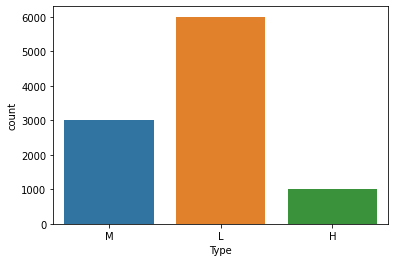

In [160]:
sns.countplot(data=df, x="Type")
#now the same result presented as piechart: 

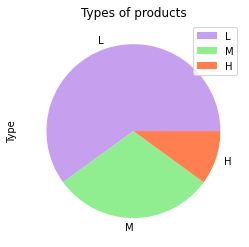

In [161]:
a = df.Type.value_counts()
a.plot(kind = "pie", colors = ['#C79FEF','#90EE90','#FF7F50'])
plt.title("Types of products")
plt.legend(loc = "best")

Text(0.5, 1.0, 'Types of products')

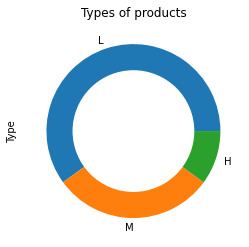

In [162]:
#instead of a pie chart, a donut chart can also be made for a cleaner look
a = df.Type.value_counts()
a.plot(kind = "pie")
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Types of products")


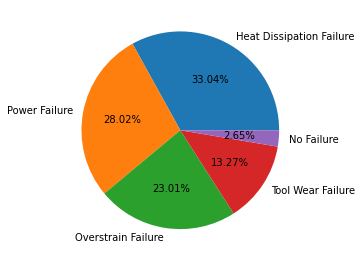

In [163]:
#milena
plt.figure(figsize = (10,10))
plt.subplot(222)
plt.pie(df[df['Target']==1]['Failure_type'].value_counts(),labels=df[df['Target']==1]['Failure_type'].value_counts().keys(),autopct='%0.2f%%')
plt.show()

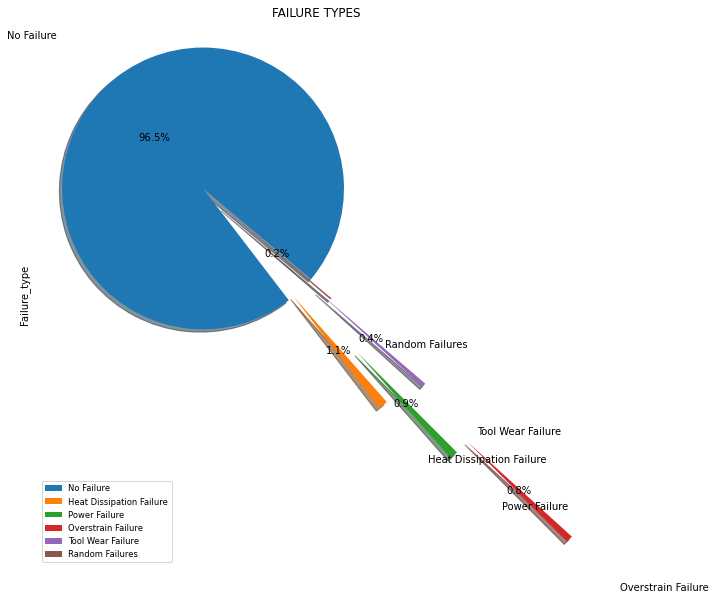

In [164]:
explode = (0.1,0.9,1.5,2.5,1,0.1)
plt.figure(figsize=(10,10))
df.Failure_type.value_counts().plot(kind="pie", explode = explode, startangle = 320, autopct = "%1.1f%%", shadow = True, pctdistance = 0.5, labeldistance = 1.5)
plt.title("FAILURE TYPES")
plt.axis("equal")
#explode --> to what extend do you wnt the slices of your pie chart to stick out
#startangle --> piechart lai rotate gardai lancha
#shadow --> True = shadow dekhaucha, False = dekhaudiana
#pctdistance --> how far the percentage is written from the actual piegraph
#labeldistance --> how far the label is written from the actual piegraph
plt.legend(loc = "lower left", fontsize = "small")

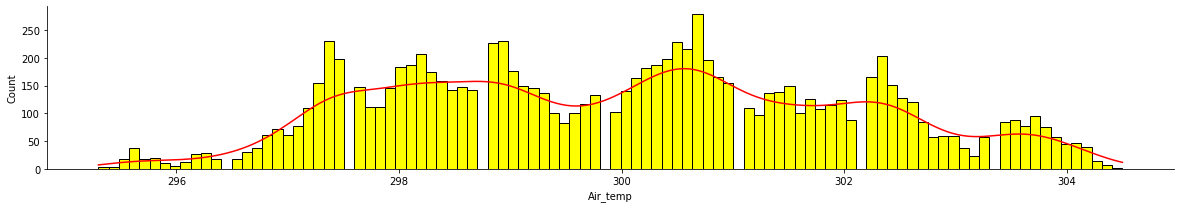

In [165]:
#how do i change the labels?
sns.displot(data=df, x="Air_temp", kde=True, bins = 100, color = "red", facecolor = "yellow", height = 3, aspect = 5.5);

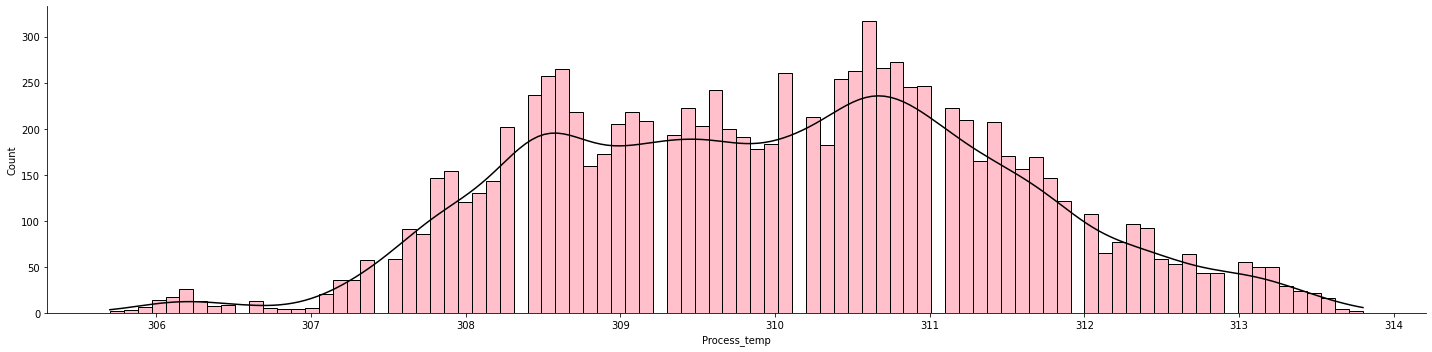

In [166]:
sns.displot(data=df, x="Process_temp", kde=True, bins = 90, color = "black", facecolor = "pink", height = 5, aspect = 4);

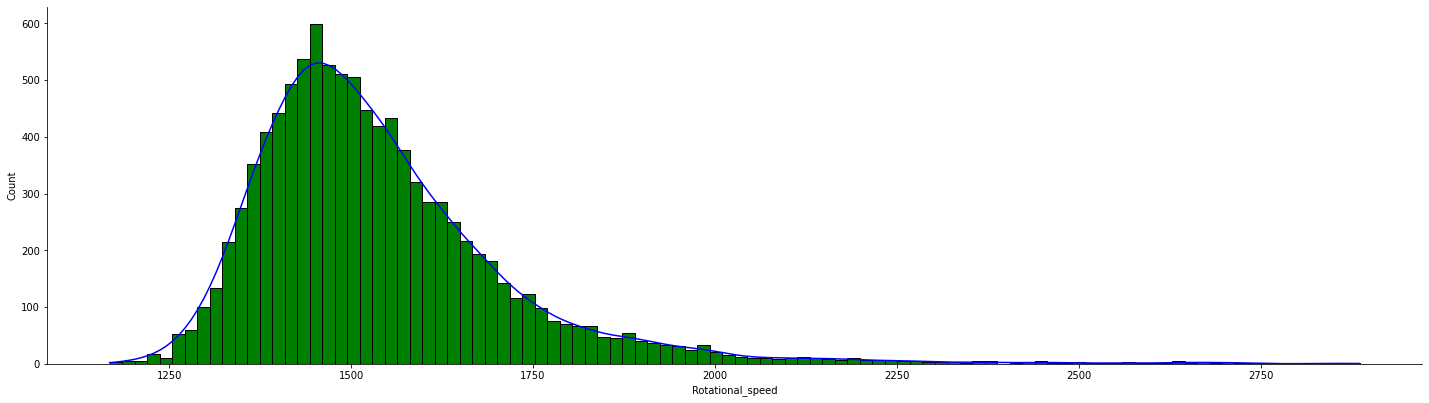

In [167]:
sns.displot(data=df, x="Rotational_speed", kde=True, bins = 100, color = "blue", facecolor = "green", height = 5.7, aspect = 3.5);

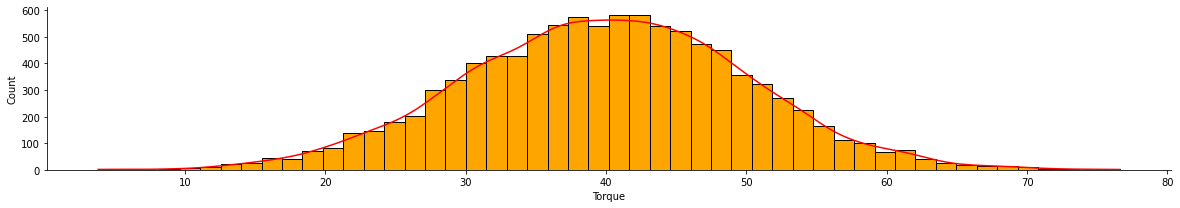

In [168]:
sns.displot(data=df, x="Torque", kde=True, bins = 50, color = "red", facecolor = "orange", height = 3, aspect = 5.5);

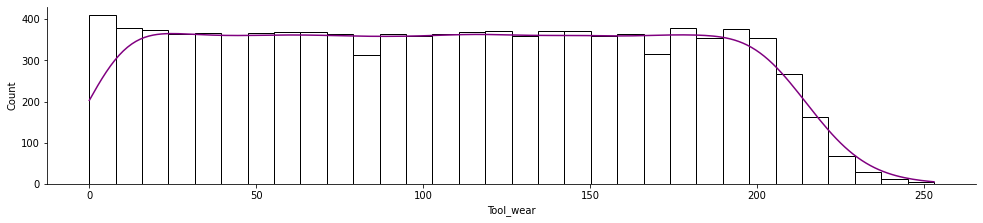

In [169]:
sns.displot(data=df, x="Tool_wear", kde=True, bins = 32, color = "purple", facecolor = "white", height = 3.2, aspect = 4.3);

In [170]:
#pd.cut --> separates the array elements into bins(range
sorted_torque = pd.cut(df.Torque,bins=5).value_counts().sort_index()
sorted_torque

(3.727, 18.36]     150
(18.36, 32.92]    2280
(32.92, 47.48]    5294
(47.48, 62.04]    2145
(62.04, 76.6]      131
Name: Torque, dtype: int64

Text(0, 0.5, 'Frequency')

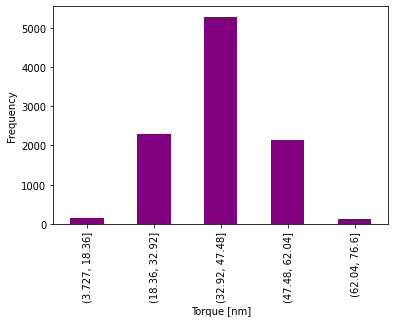

In [171]:
sorted_torque.plot(kind="bar", color = "purple")
plt.xlabel("Torque [nm]") 
plt.ylabel("Frequency")

Type
H    AxesSubplot(0.125,0.125;0.775x0.755)
L    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Tool_wear, dtype: object

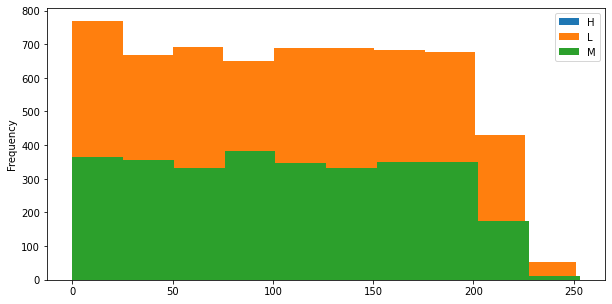

In [172]:
plt.figure(figsize=(10,5))
df.groupby("Type").Tool_wear.plot(kind='hist',alpha=1, legend = True)

Type
H    AxesSubplot(0.125,0.125;0.775x0.755)
L    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Torque, dtype: object

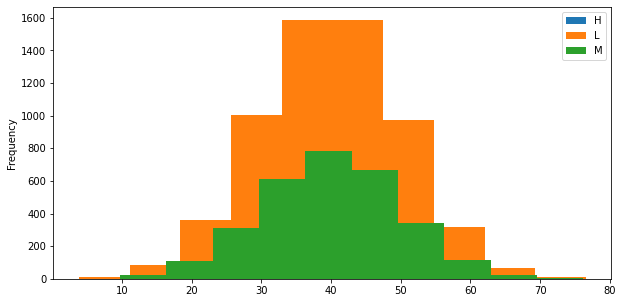

In [173]:
plt.figure(figsize=(10,5))
df.groupby("Type").Torque.plot(kind='hist',alpha=1, legend = True)

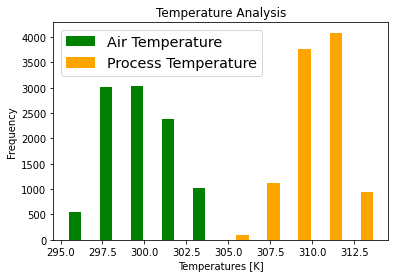

In [174]:
plt.xlabel("Temperatures [K]")
plt.ylabel("Frequency")
plt.title("Temperature Analysis")
plt.hist([(df.Air_temp), (df.Process_temp)], rwidth = 0.8, color = ["green", "orange"], label = ["Air Temperature", "Process Temperature"])
plt.legend(fontsize = "x-large")

#evaluation: 
# the bargraph below does not give a clear picture as to the air and process temperatures, therefore i will be making
# a line graph expeting to see a better/clearer result

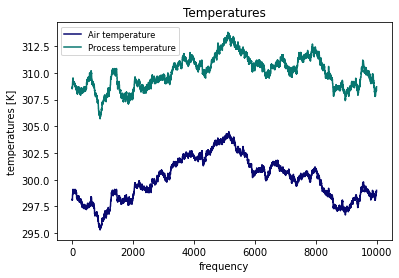

In [175]:
plt.xlabel("frequency")
plt.ylabel("temperatures [K]")
plt.title("Temperatures")
plt.plot(df.Air_temp, label = 'Air temperature', color = "#080870")
plt.plot(df.Process_temp, label = 'Process temperature', color = "#087770")

plt.legend(shadow=False, fontsize = "small", loc = "best")

#plt.legend("best") --> matplotlib will decide where to place the legend

#evaluation:
#in my opinion, the line graph is much more meaningful than the bargraph presented above
#this line graph shows:
#   pressure temp > air temp
#   the highest frequency in both cases --> around 5000

In [176]:
#scatterplot --> makes it esier to detect the relationship between any two features
pred_main = px.scatter(df, x = "Rotational_speed", y= "Torque", log_x = True, size_max = 20, color = "Type", hover_name = "Failure_type")
pred_main.show()

#evaluation: 
#it can be seen that as rotational speed increases, torque decreases. 

In [177]:
#products with no failure and their type
type_nofailure = df[df.Failure_type == "No Failure"].value_counts()
type_failure = [(df.Failure_type == "Heat Dissipation Failure") , (df.Failure_type == "Power Failure") , 
             (df.Failure_type == "Overstrain Failure") , (df.Failure_type == "Tool Wear Failure") , 
             (df.Failure_type == "Random Failure")]

LABEL ENCODING

In [178]:
df.head(2)

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target,Failure_type
UDI,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L,298.2,308.7,1408,46.3,3,0,No Failure


In [179]:
df1 = df.copy()

In [180]:
#shows the non-numerical values within the dataset
def nonnumeric_vals(df1):
  for column in df1:
    if df[column].dtypes == "object":
      print(f"{df[column].unique()}")

In [181]:
nonnumeric_vals(df1)
#categorical data

['M' 'L' 'H']
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [182]:
df1.replace("No Failure", "No", inplace = True)
df1.replace("Power Failure", "Yes", inplace = True)
df1.replace("Tool Wear Failure", "Yes", inplace = True)
df1.replace("Overstrain Failure", "Yes", inplace = True)
df1.replace("Random Failures", "Yes", inplace = True)
df1.replace("Heat Dissipation Failure", "Yes", inplace = True)

In [183]:
df1.Failure_type.unique()

array(['No', 'Yes'], dtype=object)

In [184]:
#converting into numericals 
df1.head(2)
#only failure_type and type are the columns w non-numericl values

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target,Failure_type
UDI,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,No
2,L,298.2,308.7,1408,46.3,3,0,No


In [185]:
df1.Type.value_counts().sort_values()
#ordinal categorical data --> LabelEncoder
#high,medium, low

H    1003
M    2997
L    6000
Name: Type, dtype: int64

In [186]:
from sklearn.preprocessing import LabelEncoder

In [187]:
LE = LabelEncoder()
LE

LabelEncoder()

In [188]:
#numerical value ma change gareko
df1.Type = LE.fit_transform(df1.Type)

In [189]:
df1.head(2)

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target,Failure_type
UDI,,,,,,,,
1,2,298.1,308.6,1551,42.8,0,0,No
2,1,298.2,308.7,1408,46.3,3,0,No


In [190]:
#before and after 
df1.Type.value_counts(),df.Type.value_counts()

(1    6000
 2    2997
 0    1003
 Name: Type, dtype: int64, L    6000
 M    2997
 H    1003
 Name: Type, dtype: int64)

In [191]:
df2 = df1.copy()

In [192]:
df2.head()

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target,Failure_type
UDI,,,,,,,,
1,2,298.1,308.6,1551,42.8,0,0,No
2,1,298.2,308.7,1408,46.3,3,0,No
3,1,298.1,308.5,1498,49.4,5,0,No
4,1,298.2,308.6,1433,39.5,7,0,No
5,1,298.2,308.7,1408,40.0,9,0,No


In [193]:
#since the author of the dataset implied there are two targets, i will be dropping "Failure_type" from d2 -- no leakage
df2 = df2.drop("Failure_type", axis = 1)


In [194]:
df2.head()

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target
UDI,,,,,,,
1,2,298.1,308.6,1551,42.8,0,0
2,1,298.2,308.7,1408,46.3,3,0
3,1,298.1,308.5,1498,49.4,5,0
4,1,298.2,308.6,1433,39.5,7,0
5,1,298.2,308.7,1408,40.0,9,0


Features and Target

In [195]:
#specifying features and target variable
x = df2.drop("Target", axis = 1) #features
y = df2.Target #target

In [196]:
x.head(2)

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear
UDI,,,,,,
1,2,298.1,308.6,1551,42.8,0
2,1,298.2,308.7,1408,46.3,3


In [197]:
y.head(2)

UDI
1    0
2    0
Name: Target, dtype: int64

Train, Test and Split

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)
#20% --> testing , 80% --> rainign

In [200]:
x_test.shape, x_train.shape

((2000, 6), (8000, 6))

In [201]:
y_test.shape, y_train.shape

((2000,), (8000,))

In [202]:
x_train.head()

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear
UDI,,,,,,
2695,2,300.1,309.6,1625,38.0,46
5141,2,304.3,313.6,1585,32.1,202
2569,1,299.6,309.2,1450,43.1,160
3672,2,302.3,311.7,1486,39.6,147
7428,1,300.0,311.4,1634,31.9,0


Scaling the data

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
SS = StandardScaler()
SS

StandardScaler()

In [205]:
xtrain_scaled = SS.fit_transform(x_train)
xtrain_scaled

array([[ 1.32989889,  0.04562227, -0.27621559,  0.48089353, -0.19692715,
        -0.96891023],
       [ 1.32989889,  2.14291088,  2.42161396,  0.25705033, -0.78889503,
         1.47331113],
       [-0.34240402, -0.20405495, -0.54599855, -0.49842045,  0.31477391,
         0.81578999],
       ...,
       [-0.34240402, -2.20147267, -2.63681645, -0.36411453,  0.12414018,
         0.75316893],
       [-0.34240402,  1.94316911,  2.08438527, -1.28187164,  2.30137799,
         0.34613204],
       [ 1.32989889, -0.95308659, -1.1530102 ,  0.78867792, -0.62836137,
         1.20717162]])

In [206]:
xtest_scaled = SS.transform(x_test)
xtest_scaled

array([[-0.34240402, -0.95308659, -1.49023889,  0.14512874, -0.4678277 ,
         0.17392412],
       [ 1.32989889,  1.14420202,  0.66802475, -0.66070677,  0.13417353,
         1.16020583],
       [ 1.32989889,  1.99310455,  1.81460231, -0.46484397,  1.12747558,
         0.81578999],
       ...,
       [-0.34240402,  0.39517037,  1.54481935, -0.58236165,  0.48534092,
         0.4087531 ],
       [-0.34240402, -0.40379672, -1.08556446,  0.71592888, -1.09992901,
         1.42634533],
       [ 1.32989889, -0.1541195 , -0.61344429,  0.35777977, -0.14676038,
         0.97234264]])

Build Model using Logistic Regression

In [207]:
from sklearn.linear_model import LogisticRegression

In [208]:
LR1 = LogisticRegression()
LR1

LogisticRegression()

In [209]:
LR1.fit(xtrain_scaled,y_train) #y_train bhaneko target, target lai sclaing na agrne --> classification bhayera

LogisticRegression()

In [210]:
ytest_pred = LR1.predict(xtest_scaled)

In [211]:
ytrain_pred = LR1.predict(xtrain_scaled)

LOGISTICS REGRESSION KO MSE & REPORTS

In [212]:
from sklearn.metrics import classification_report, confusion_matrix

In [213]:
print(classification_report(y_test, ytest_pred))
print(classification_report(y_train,  ytrain_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1937
           1       0.72      0.21      0.32        63

    accuracy                           0.97      2000
   macro avg       0.85      0.60      0.65      2000
weighted avg       0.97      0.97      0.97      2000

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7724
           1       0.75      0.17      0.28       276

    accuracy                           0.97      8000
   macro avg       0.86      0.58      0.63      8000
weighted avg       0.96      0.97      0.96      8000



[[1932    5]
 [  50   13]]


Text(33.0, 0.5, 'Actual')

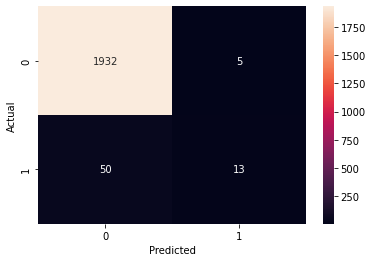

In [214]:
cm = confusion_matrix(y_test, ytest_pred)
print(cm)

sns.heatmap(cm,  annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Random Forest Classifier

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
RFM = RandomForestClassifier()

In [217]:
RFM.fit(xtrain_scaled, y_train)

RandomForestClassifier()

In [218]:
ytest_pred = RFM.predict(x_test)
ytrain_pred = RFM.predict(xtrain_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [219]:
RFM.score(xtrain_scaled,y_train)

0.999875

In [220]:
#confusion matrix to evaluate how good the model is
cm = confusion_matrix(y_test, ytest_pred)
print(cm)


[[   0 1937]
 [   0   63]]


In [221]:
#classification model to evaluate how good the model is
print(classification_report(y_test, ytest_pred))
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1937
           1       0.03      1.00      0.06        63

    accuracy                           0.03      2000
   macro avg       0.02      0.50      0.03      2000
weighted avg       0.00      0.03      0.00      2000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7724
           1       1.00      1.00      1.00       276

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [222]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

USING SMOTE

In [223]:
x.head()

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear
UDI,,,,,,
1,2,298.1,308.6,1551,42.8,0
2,1,298.2,308.7,1408,46.3,3
3,1,298.1,308.5,1498,49.4,5
4,1,298.2,308.6,1433,39.5,7
5,1,298.2,308.7,1408,40.0,9


In [224]:
y.head()

UDI
1    0
2    0
3    0
4    0
5    0
Name: Target, dtype: int64

In [225]:
from imblearn.over_sampling import SMOTE

In [226]:
smote = SMOTE(sampling_strategy='minority')
x_smote, y_smote = smote.fit_resample(x,y)

In [227]:
x_smote.value_counts()

Type  Air_temp    Process_temp  Rotational_speed  Torque     Tool_wear
0     295.500000  305.900000    1593              37.200000  197          1
1     302.348980  310.466058    1363              66.601826  78           1
      302.346714  310.619717    1377              50.303538  165          1
      302.346363  310.709773    1341              49.717271  158          1
      302.346205  310.260825    1367              50.883598  14           1
                                                                         ..
      299.401576  310.071731    1292              67.095814  9            1
      299.400000  310.900000    1751              27.800000  10           1
                  310.800000    1622              33.600000  217          1
                                1424              47.700000  109          1
2     304.400000  313.600000    1510              38.900000  199          1
Length: 19322, dtype: int64

In [228]:
y_smote.value_counts()

0    9661
1    9661
Name: Target, dtype: int64

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=5, stratify=y_smote)

In [230]:
y_train.value_counts()

0    7729
1    7728
Name: Target, dtype: int64

In [231]:
y_test.value_counts()

1    1933
0    1932
Name: Target, dtype: int64

In [232]:
LR1 = LogisticRegression()
LR1.fit(x_train, y_train)

LogisticRegression()

In [233]:
ypred1 = LR1.predict(x_test)
ypred2 = LR1.predict(x_train)

In [234]:
print(classification_report(y_test, ypred1))
#a much better result can be seen now that smote has been applied

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1932
           1       0.84      0.84      0.84      1933

    accuracy                           0.84      3865
   macro avg       0.84      0.84      0.84      3865
weighted avg       0.84      0.84      0.84      3865



In [235]:
print(classification_report(y_train, ypred2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7729
           1       0.83      0.83      0.83      7728

    accuracy                           0.83     15457
   macro avg       0.83      0.83      0.83     15457
weighted avg       0.83      0.83      0.83     15457



[[1617  315]
 [ 312 1621]]


Text(33.0, 0.5, 'Actual')

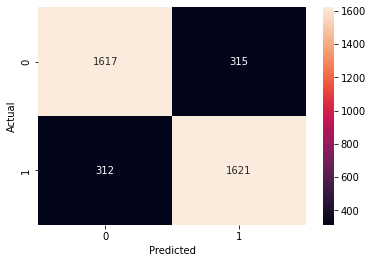

In [236]:
CM1 = confusion_matrix(y_test, ypred1)
print(CM1)
#again, a better result than without smote
sns.heatmap(CM1,  annot=True, fmt='d')
#fmt --> diigt ma lekhera aucha, e bhanera aaudaina
plt.xlabel('Predicted')
plt.ylabel('Actual')